 # metadata
- Release Date
- MovieName–Name of the movie
- ReleaseTime–Mentions special time of release. LW (Long weekend), FS (Festive Season), HS (Holiday Season), N (Normal)
- Genre –Genre of the film such as Romance, Thriller, Action, Comedy,etc
- Budget –Movie creation budget
- BoxOfficeCollection–Box office collection
- YoutubeViews–Number of views of the YouTube trailers
- YoutubeLikes–Number of likes of the YouTube trailers
- YoutubeDislikes–Number of dislikes of the YouTube trailers

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy as np
#reading the data set
bollywood = pd.read_csv("bollywood.csv")
bollywood

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


# Q1

In [2]:
len(bollywood)

149

 # Q2
 

In [3]:
#formatting data
bollywood['Genre']=bollywood['Genre'].str.strip()

In [4]:
bollywood['ReleaseTime'].value_counts()

N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64

# Q3

In [5]:
Genre = bollywood['Genre'].str.strip().value_counts()
Genre.loc[Genre == Genre.max()]

Comedy    36
Name: Genre, dtype: int64

In [6]:
# therefore Comedy has the highest number of releases

# Q4

In [7]:
pd.crosstab(bollywood["Genre"],bollywood["ReleaseTime"])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


 # Q5

In [8]:
bollywood['month']= bollywood['Release Date']
bollywood['month'] = bollywood["month"].str.strip('0,1,2,3,4,5,6,7,8,9,0,-')

In [9]:
month_counts = bollywood['month'].value_counts()
month_counts.loc[month_counts == month_counts.min()]

Dec    2
Name: month, dtype: int64

In [10]:
# therefore december has the least number of releases

 # Q6

In [11]:
#lbm = low budget movies
lbm = bollywood[bollywood['Budget'] <= 25]['month'].value_counts()
lbm.loc[lbm == lbm.max()]

May    15
Name: month, dtype: int64

In [12]:
# May has the largest number of low release low budget movies

 # Q7

In [13]:
bollywood['ROI'] = (bollywood['BoxOfficeCollection'] - bollywood['Budget']) / bollywood['Budget']
bollywood.nlargest(n=10 , columns = ['ROI']).loc[:,['MovieName','ROI']]

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


In [14]:
# the movie with the hghest ROI is Aashiqui 2 with a ROI 8.166667

 # Q8

In [15]:
#avergae ROI for diffent release times
bollywood.groupby(['ReleaseTime'])["ROI"].mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

In [16]:
# movies released during festive seasons typically have a slightly higher ROI than those released during holiday season

 # Q9

In [17]:
#correlation between box office and Youtube Likes
bollywood["BoxOfficeCollection"].corr(bollywood["YoutubeLikes"])

0.6825165877731297

In [18]:
# there is a correlation of 0.6825165877731297 which indicates a moderately positive correlation 

 # Q10

Text(0.5, 1.0, 'Genre vs Youtube views')

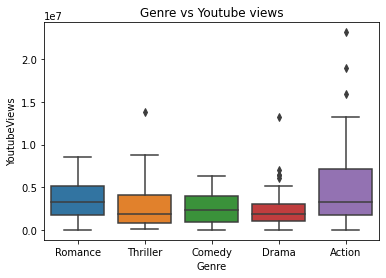

In [19]:
#genre = bollywood['Genre'].str.strip().value_counts()
# generating box plot
sb.boxplot(x = bollywood["Genre"], y= bollywood["YoutubeViews"]).set_title("Genre vs Youtube views")

 # Q11

<AxesSubplot:>

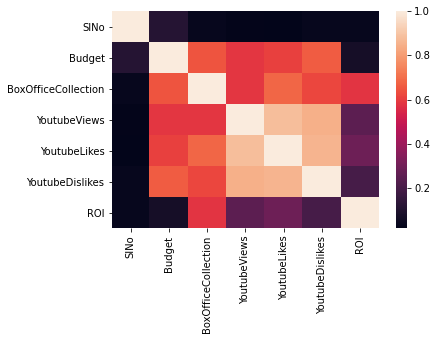

In [20]:
sb.heatmap(bollywood.corr())

# Q12

Genre
Action      91.680833
Comedy      46.115000
Drama       65.793143
Romance     52.841200
Thriller    27.936207
Name: BoxOfficeCollection, dtype: float64


Text(0.5, 1.0, 'genre vs box office')

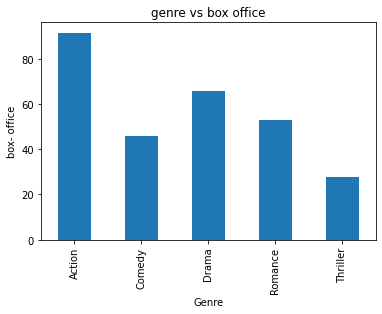

In [21]:
x = bollywood.groupby(['Genre'])['BoxOfficeCollection'].mean()
print(x)
x.plot(kind = 'bar')
plt.xlabel("Genre")
plt.ylabel("box- office")
plt.title("genre vs box office")

# Q13

In [25]:
pd.pivot_table(data=bollywood,index='Genre',values='BoxOfficeCollection',aggfunc=np.sum)

,BoxOfficeCollection
Genre,
Action,2200.34
Comedy,1660.14
Drama,2302.76
Romance,1321.03
Thriller,810.15


In [ ]:
pd.pivot_table(data=bollywood,index='Genre',values='Budget',aggfunc=np.sum)

 # Q14

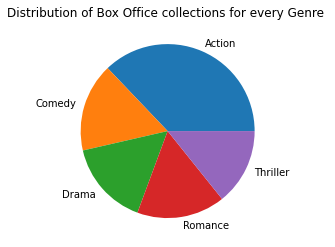

In [23]:
pie=pd.pivot_table(bollywood,index='Genre',values='Budget')
plt.pie(pie.Budget,labels=['Action','Comedy','Drama','Romance','Thriller'])
plt.title("Distribution of Box Office collections for every Genre ")
plt.show()

 # Q15

year
2013    2.245396e+06
2014    4.119694e+06
2015    4.877498e+06
Name: YoutubeViews, dtype: float64


<AxesSubplot:title={'center':' year vs views and likes'}, xlabel=' years', ylabel='youtube views and likes'>

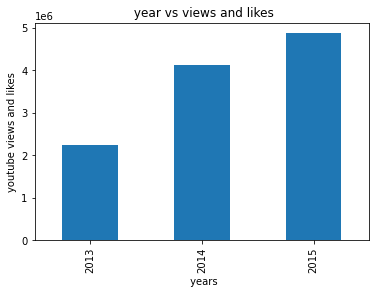

In [24]:
#Adding a year column extracting from release date
bollywood['year'] = pd.DatetimeIndex(bollywood['Release Date']).year 
a = bollywood.groupby(['year'])['YoutubeViews'].agg('mean')
print(a)
a.plot(kind = 'bar', xlabel =" years", ylabel = "youtube views and likes", title = " year vs views and likes")